
*Moja-Global/Outreachy December 2023 Contribution Phase *

#Task 4- Visualization Prototype


**Objective:**
The objective of this task was to develop a visualization prototype that represents the relationships between land attributes and Sustainable Development Goals (SDGs) in a planted forest database, specifically focusing on India.


Methodology:

1. Data Import and Selection: Imported the planted forest database and focused on data specific to India.

2. Exploration and Data Analysis:Explored the dataset to identify various species of trees, distinguishing between planted trees and crop trees.

3. SDG Mapping: Focused on SDG 1 (No Poverty), SDG 2 (Zero Hunger), SDG 13 (Climate Action), and SDG 15 (Life on Land).
Created a new column "SDG Mapping" to represent the association of each tree type with the selected SDGs.

4. Area Calculation: Calculated the area from the 'geometry' column and added it as a new column in the dataset.

5. Bar Chart Creation: Created a bar chart to show the relationship between tree species and their corresponding area, using color-coding to differentiate between tree crops and planted forests.

6. Pie Chart Creation: Developed a pie chart to illustrate the distribution of SDGs by area.

**Findings:**

The bar chart provides a clear visual representation of the dominant tree species in the region and the area they cover, with distinct color-coding to differentiate between tree crops and planted forests.
The pie chart reveals the distribution of SDGs in relation to the area covered by the trees, providing insights into the prevalence of specific SDGs in the dataset.

**Conclusion:**

The visualization prototype developed in this task successfully represents the relationships between land attributes and SDGs in a planted forest database focused on India. This prototype can be a valuable tool for researchers and policymakers, providing clear insights that can inform future research, policy decisions, and conservation efforts.

In [3]:
# install and import condalab, run twice.
!pip install -q condacolab -q

In [1]:
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [2]:
# Mounting the google drive on google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import all necessary libraries
import numpy as np
import geopandas as gpd
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

%matplotlib inline


In [4]:
def column_std(df):
    """
    Standardises column names
    """
    return df.columns.str.lower()

def clip_df(df_complete, df_n):
    """
    Clips the dataset to retain only the necessary data
    """
    return df_complete.clip(df_n)

def plot_boundary(df, ax, color='none', edgecolor='black'):
    """
    Plots the administrative boundaries
    """
    df.plot(ax=ax, color=color, edgecolor=edgecolor)

def plot_feature(df, ax, column, edgecolor='black', cmap='tab20'):
    """
    Plots the features
    """
    df.plot(ax=ax, column=column, edgecolor=edgecolor, cmap=cmap, legend=True)

In [5]:
# Loading the administraive boundaries of India
ind_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level2 by Country/IND/IND_AL2_India.json")
# Read geojson file into a geodataframe
ind_df = gpd.read_file(ind_df)

# Visualization Prototype

In [7]:
## Loading the planted forest data
planted_forest = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/LandCover/Forest/Planted_Forests_SDPT/IND_India_SDPT.json")
# Read json file into a dataframe
ind_forest_df = gpd.read_file(planted_forest)
ind_forest_df.head(5)

,final_id,iso,country,org_name,common_name,species,species_simp,plant_ag,timber_ag,ever_dec,conifer_broad,hard_soft,size,source,year,geometry
0,IND_102,IND,India,Mixed plantation,Unknown,Unknown,Unknown,Planted forest,Unknown,Unknown,Unknown,Unknown,Unknown,Roy et al. (2016),2015,"POLYGON ((74.41082 34.81917, 74.41081 34.81939..."
1,IND_41,IND,India,Pine,Pine,Pinus sp.,Wood fiber / timber,Planted forest,Timber,Evergreen,Conifer,Softwood,Unknown,Roy et al. (2016),2015,"POLYGON ((74.19336 34.76270, 74.19335 34.76291..."
2,IND_41,IND,India,Pine,Pine,Pinus sp.,Wood fiber / timber,Planted forest,Timber,Evergreen,Conifer,Softwood,Unknown,Roy et al. (2016),2015,"POLYGON ((74.20674 34.75795, 74.20671 34.75838..."
3,IND_41,IND,India,Pine,Pine,Pinus sp.,Wood fiber / timber,Planted forest,Timber,Evergreen,Conifer,Softwood,Unknown,Roy et al. (2016),2015,"POLYGON ((74.21420 34.75582, 74.21419 34.75603..."
4,IND_102,IND,India,Mixed plantation,Unknown,Unknown,Unknown,Planted forest,Unknown,Unknown,Unknown,Unknown,Unknown,Roy et al. (2016),2015,"POLYGON ((74.07016 34.71574, 74.07015 34.71595..."


In [8]:
class_name_counts = ind_forest_df['species'].value_counts()
print(class_name_counts)

Pinus sp.                 667078
Unknown                   350009
Shorea robusta            116489
Tectona sp.                66284
Areca sp.                  12853
Eucalyptus sp.             12131
Acacia sp.                  3121
Mangifera sp.               3002
Cocos nucifera              1023
Prunus dulcis                740
Thea sinensis                523
Casuarina sp.                335
Hevea brasiliensis           157
Gliricidia sp.               153
Malus pumila                 151
Cryptomeria japonica         146
Elaeis guineensis            125
Pterocarpus sp.              109
Anacardium occidentale        62
Alnus sp.                     19
Citrus sp.                    11
Coffea sp.                    10
Name: species, dtype: int64


I loaded the planted forest data ans enlisted the type of tree species in the forest. In the planted forest datasets there is a column "planted_ag" which is giving info on whether the forest is planted tree or crop tree.

**Planted Crop Tree**: The planted tree crop would be relevant for SDG1 (No Poverty), SDG2 (Zero hunger) as the tree crop would bring resources of livelihood and food security.


**Planted forest Tree**: The planted forest tree would be helpful in SDG13 (Climate Action) and SDG15 (life on land) as the fortest tree can provide carbon sink and marked as life on land.

In the following section I am mapping the SDG based on the planted tree and tree crop category given in the plant_ag and creating a new column "SDG_Mapping" in the given dataframe.

In [17]:
def planted_forest_to_sdg(row):
    # List of known marine hotspots
    planted_forest = [
        'Planted_forest',
        'Tree crops'
    ]

    # Check if the planted trees are forest tree or the crop tree
    if row['plant_ag'] in planted_forest:
        return "Planted Forest:SDG-13&15 (Climate action & life on land)"
    else:
        return "Tree Crop: SDG-1&2 (No poverty & Zero Hunger)"

In [18]:
# Apply the mapping functions

ind_forest_df['SDG_Mapping'] = ind_forest_df.apply(planted_forest_to_sdg, axis=1)


In [19]:
ind_forest_df.to_file("Planted_forest.json", driver='GeoJSON')

In [20]:
ind_forest_df.head()

,final_id,iso,country,org_name,common_name,species,species_simp,plant_ag,timber_ag,ever_dec,conifer_broad,hard_soft,size,source,year,geometry,SDG_Mapping
0,IND_102,IND,India,Mixed plantation,Unknown,Unknown,Unknown,Planted forest,Unknown,Unknown,Unknown,Unknown,Unknown,Roy et al. (2016),2015,"POLYGON ((74.41082 34.81917, 74.41081 34.81939...",Tree Crop: SDG-1&2 (No poverty & Zero Hunger)
1,IND_41,IND,India,Pine,Pine,Pinus sp.,Wood fiber / timber,Planted forest,Timber,Evergreen,Conifer,Softwood,Unknown,Roy et al. (2016),2015,"POLYGON ((74.19336 34.76270, 74.19335 34.76291...",Tree Crop: SDG-1&2 (No poverty & Zero Hunger)
2,IND_41,IND,India,Pine,Pine,Pinus sp.,Wood fiber / timber,Planted forest,Timber,Evergreen,Conifer,Softwood,Unknown,Roy et al. (2016),2015,"POLYGON ((74.20674 34.75795, 74.20671 34.75838...",Tree Crop: SDG-1&2 (No poverty & Zero Hunger)
3,IND_41,IND,India,Pine,Pine,Pinus sp.,Wood fiber / timber,Planted forest,Timber,Evergreen,Conifer,Softwood,Unknown,Roy et al. (2016),2015,"POLYGON ((74.21420 34.75582, 74.21419 34.75603...",Tree Crop: SDG-1&2 (No poverty & Zero Hunger)
4,IND_102,IND,India,Mixed plantation,Unknown,Unknown,Unknown,Planted forest,Unknown,Unknown,Unknown,Unknown,Unknown,Roy et al. (2016),2015,"POLYGON ((74.07016 34.71574, 74.07015 34.71595...",Tree Crop: SDG-1&2 (No poverty & Zero Hunger)


In [29]:
# Reproject the GeoDataFrame to a projected CRS
ind_forest_df_projected = ind_forest_df.to_crs(epsg=3395)

# Now, calculate the area
ind_forest_df_projected['area'] = ind_forest_df_projected['geometry'].area

In [30]:

# Calculate area
ind_forest_df['area'] = ind_forest_df['geometry'].area

# Show the result
#print(ind_forest_df[['geometry', 'area']])

ind_forest_df.head(2)

<ipython-input-30-75032fb7c618>:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ind_forest_df['area'] = ind_forest_df['geometry'].area


,final_id,iso,country,org_name,common_name,species,species_simp,plant_ag,timber_ag,ever_dec,conifer_broad,hard_soft,size,source,year,geometry,SDG_Mapping,area
0,IND_102,IND,India,Mixed plantation,Unknown,Unknown,Unknown,Planted forest,Unknown,Unknown,Unknown,Unknown,Unknown,Roy et al. (2016),2015,"POLYGON ((74.41082 34.81917, 74.41081 34.81939...",Tree Crop: SDG-1&2 (No poverty & Zero Hunger),0.000004
1,IND_41,IND,India,Pine,Pine,Pinus sp.,Wood fiber / timber,Planted forest,Timber,Evergreen,Conifer,Softwood,Unknown,Roy et al. (2016),2015,"POLYGON ((74.19336 34.76270, 74.19335 34.76291...",Tree Crop: SDG-1&2 (No poverty & Zero Hunger),0.000016


<ipython-input-56-b4486e0f0276>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = matplotlib.cm.get_cmap('nipy_spectral', len(species_unique))


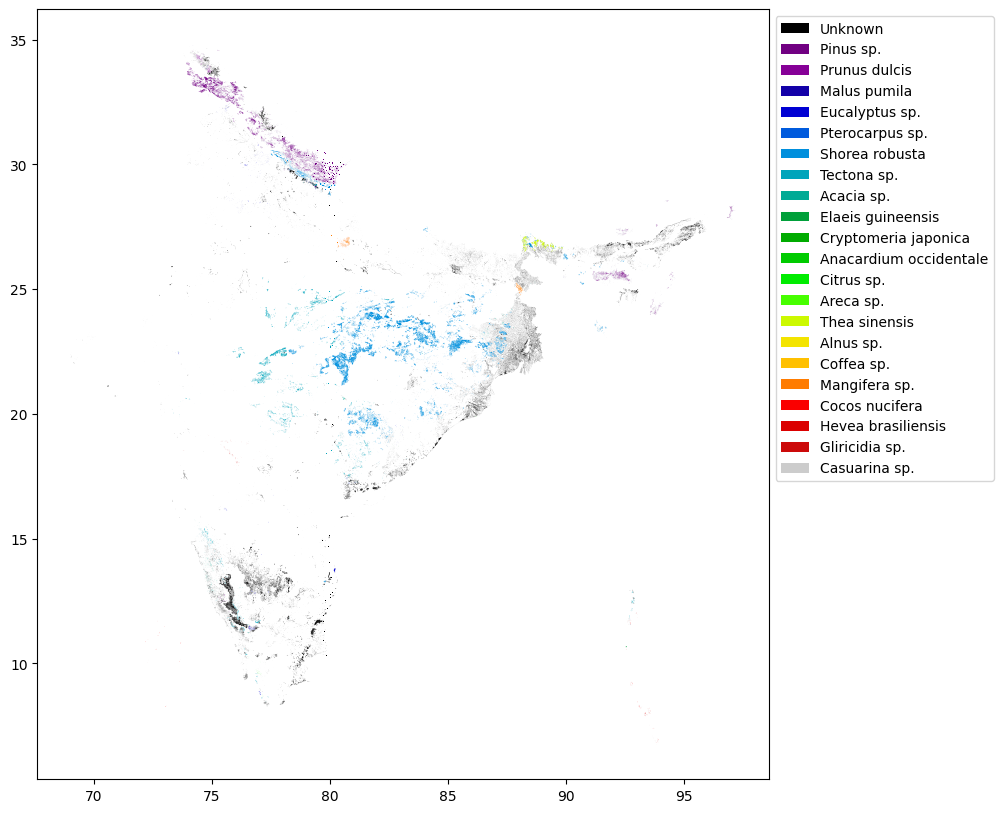

In [56]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(ind_forest_df, geometry='geometry')

# Plotting the map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot 'species' with a specific color
species_unique = gdf['species'].unique()
colormap = matplotlib.cm.get_cmap('nipy_spectral', len(species_unique))
colors = [colormap(i) for i in range(len(species_unique))]
color_dict = dict(zip(species_unique, colors))

patches = []
for species in species_unique:
    gdf[gdf['species'] == species].plot(ax=ax, color=color_dict[species])
    patches.append(plt.Rectangle((0, 0), 1, 1, fc=color_dict[species]))

# Show legend and plot
ax.legend(patches, species_unique, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

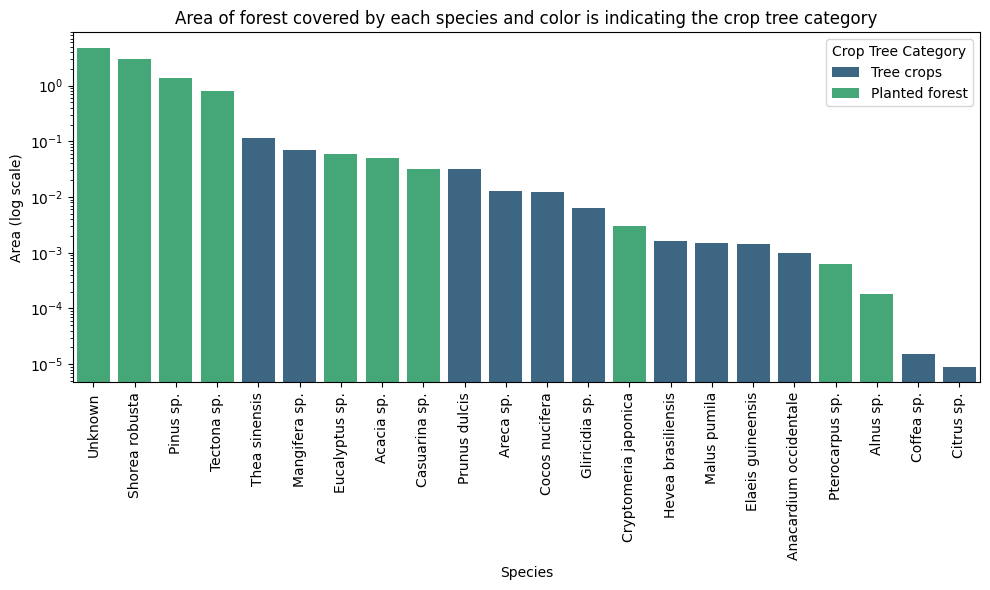

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by species and calculating the total area for each species
grouped = ind_forest_df.groupby('species')['area'].sum().reset_index()

# Merging the grouped data with the original dataframe to get plant_ag values for each species
merged = pd.merge(grouped, ind_forest_df[['species', 'plant_ag']], how='left', on='species')

# Dropping duplicate rows
merged = merged.drop_duplicates()

# Sorting values based on area
merged = merged.sort_values(by='area', ascending=False)

# Creating a bar chart
plt.figure(figsize=(10, 6))
bar = sns.barplot(x='species', y='area', data=merged, palette='viridis', hue='plant_ag', dodge=False, log=True)
plt.xticks(rotation=90)
plt.xlabel('Species')
plt.ylabel('Area (log scale)')
plt.yscale('log')
plt.title('Area of forest covered by each species and color is indicating the crop tree category')
plt.legend(title='Crop Tree Category')
plt.tight_layout()
plt.show()

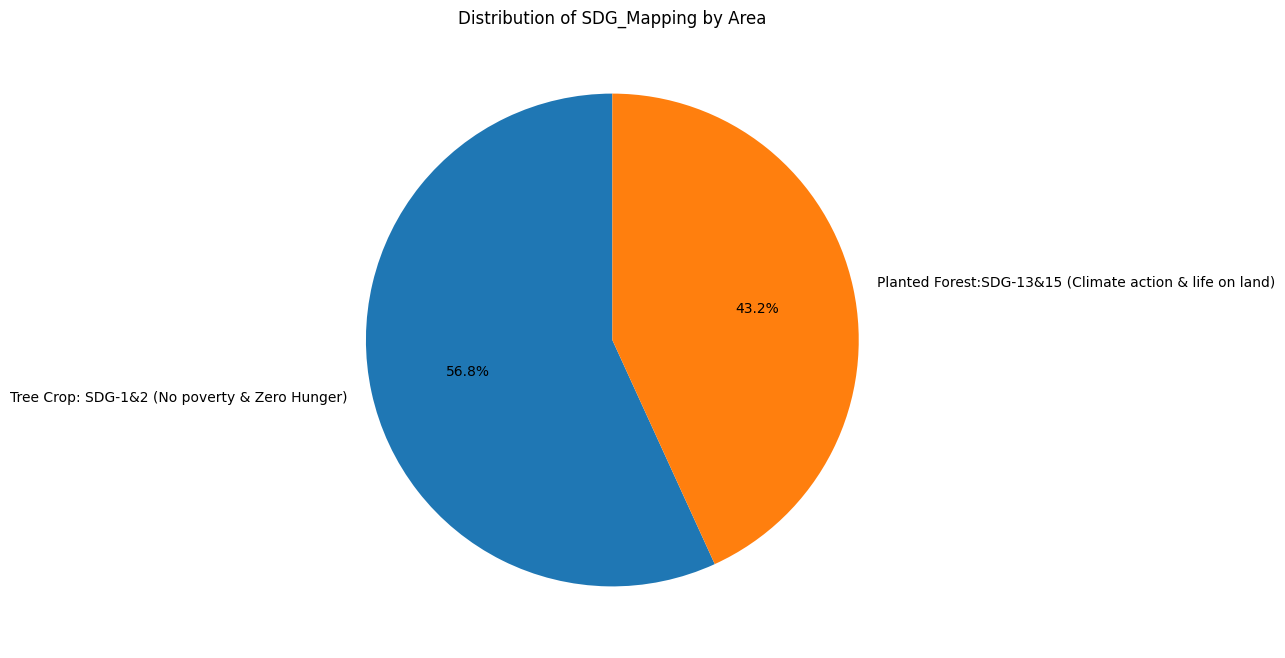

In [37]:
# Group the data by 'SDG_Mapping' and calculate the sum of 'area' for each SDG
sdg_area = ind_forest_df.groupby('SDG_Mapping')['area'].sum()

# Sort the SDG areas
sdg_area_sorted = sdg_area.sort_values(ascending=False)

# Creating a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sdg_area_sorted, labels=sdg_area_sorted.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of SDG_Mapping by Area')
plt.show()